# Beta Bank Supervised Machine Learning

Project on Supervised Machine Learning

Beta Bank customers have been gradually leaving.  Managment know it’s cheaper to retain existing customers rather than to attract new ones. Project below will predict whether a customer will leave the bank soon. The projected information will be based on other clients’ past behavior and termination of contracts with the bank.A model with the maximum possible F1 score (at least 0.59 for the test set) will be created.  A compasrision between the F1 and AUC-ROC metric and compare it with the F1.

Previous customer history will be dowloaded and examined. The balance of classes will be examined. Initial model will be trained without taking into account the imbalance. Model will then be improved. Two approaches will be utilized to fixing class imbalance. Training set will enable us to pick the best parameters. The different models will be trained on training and validation sets to determine the best one. 

Following is a description of the file being examined:

Features:
RowNumber — data string index
CustomerId — unique customer identifier
Surname — surname
CreditScore — credit score
Geography — country of residence
Gender — gender
Age — age
Tenure — period of maturation for a customer’s fixed deposit (years)
Balance — account balance
NumOfProducts — number of banking products used by the customer
HasCrCard — customer has a credit card
IsActiveMember — customer’s activeness
EstimatedSalary — estimated salary

Target:
Exited — сustomer has left

In [1]:
#import all needed libraries 
import pandas as pd

#import display libraries 
import seaborn as sns
import matplotlib.pyplot as plt

#import named regression models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

#import ability to split into training and testing data sets 
from sklearn.model_selection import train_test_split

#import ability to evaluate accuracy of data 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#import classification models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from joblib import dump

#needed to compare. 
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


In [2]:
beta=pd.read_csv('/datasets/Churn.csv')

PreProcessing 

In [3]:
#explore info
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#print first 5 rows 
beta.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
#check for blank cells 
beta.isna().sum()
#there are a lot of blanks in the "Tenure" column. theres only 1000 rows and 90% are blank. 

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
#search if any zeros are present 
tenure_zero=beta[beta['Tenure']==0]
tenure_zero.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 29 to 9919
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        382 non-null    int64  
 1   CustomerId       382 non-null    int64  
 2   Surname          382 non-null    object 
 3   CreditScore      382 non-null    int64  
 4   Geography        382 non-null    object 
 5   Gender           382 non-null    object 
 6   Age              382 non-null    int64  
 7   Tenure           382 non-null    float64
 8   Balance          382 non-null    float64
 9   NumOfProducts    382 non-null    int64  
 10  HasCrCard        382 non-null    int64  
 11  IsActiveMember   382 non-null    int64  
 12  EstimatedSalary  382 non-null    float64
 13  Exited           382 non-null    int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 44.8+ KB


In [7]:
#since there are 382 zeros in the Tenure column calculate the mean of the column to use as replacement for NAN
display(beta['Tenure'].mean())
#check a small sample of rows for sig figs being used in 'Tenure' column 
display(beta.tail(5))

4.997690023099769

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [8]:
# Reviewer's code 2

display(beta.head(3))

beta.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [9]:
#subsitute in 5.0 instead of NAN in "Tenure" column since represents in full numbers.  
#confirm datatype of column trying to replace 
print(beta.dtypes)
#insert number 
beta['Tenure']=beta['Tenure'].fillna(value=beta['Tenure'].median())
#confirm replacement 
print(beta.isna().sum())
print(beta.dtypes)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsAc

Replacement was successful. 

In [10]:
beta.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [11]:
#see any duplicates 
print(beta.duplicated().sum())
print(beta['CustomerId'].duplicated().sum())


0
0


In [12]:
#goal to remove object data from dataframe. 

#1. remove unecessary columns since memberID is present for uniqueness. 
#surname not necessary since not a number
#RowNumber not necessary since in the dataframe already shown in distinct columns
#CustomerID not necessary after confirming no duplicates. 
beta = beta.drop(['Surname','RowNumber','CustomerId'], axis=1)
print(beta.head(3))

#2. convert gender column onto a binary.  Male=1 and Female=2
beta['Gender']=beta['Gender'].replace('Female','2')
beta['Gender']=beta['Gender'].replace('Male', '1')
print(beta['Gender'].value_counts())
#convert the gender datatype to an integer 
beta['Gender'] = beta['Gender'].astype('int')

#3. convert geography into a grouping binary
print(beta['Geography'].value_counts())
#geography locations are minimal.  provide conversion that Spain=1, France=2, and Germany=3 
beta['Geography']=beta['Geography'].replace('France','2')
beta['Geography']=beta['Geography'].replace('Spain', '1')
beta['Geography']=beta['Geography'].replace('Germany', '3')
print(beta['Geography'].value_counts())
#convert the gender datatype to an integer 
beta['Geography'] = beta['Geography'].astype('int')

#confirm types
print(beta.dtypes)



   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42     2.0       0.00              1   
1          608     Spain  Female   41     1.0   83807.86              1   
2          502    France  Female   42     8.0  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
1    5457
2    4543
Name: Gender, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
2    5014
3    2509
1    2477
Name: Geography, dtype: int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited              

All datatypes in dataframe have been converted to numeric represntation.  This will enable the models to work. 

In [13]:
#examine class balance 
print(beta['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


The class balance of data represented is not equal.  In the dataset the majority of users have not exited from using Beta Bank. Only around 2,000 people have left out of the 10,000 users being evaluated.  However the issue being evaluated is that people have been steadily leaving (implying there would be a higher number of ex-clientle to evaluate).  Model will initially be trained without taking into account this imbalance but it will be adjusted later.   

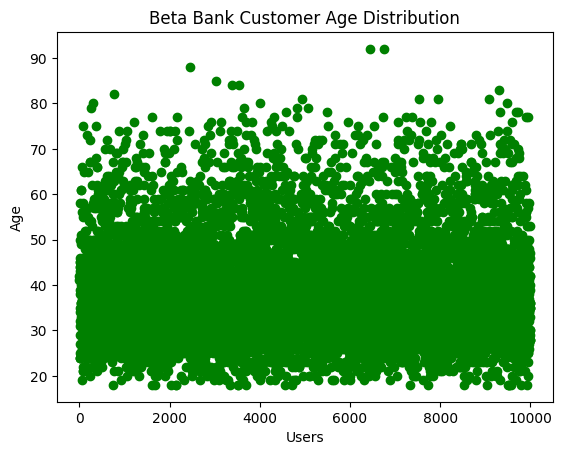

In [14]:
#explore distribution of other columns visually 
plt.scatter( beta.index, y=beta["Age"], color='green')
plt.xlabel('Users')
plt.ylabel('Age')
plt.title('Beta Bank Customer Age Distribution')
plt.show()


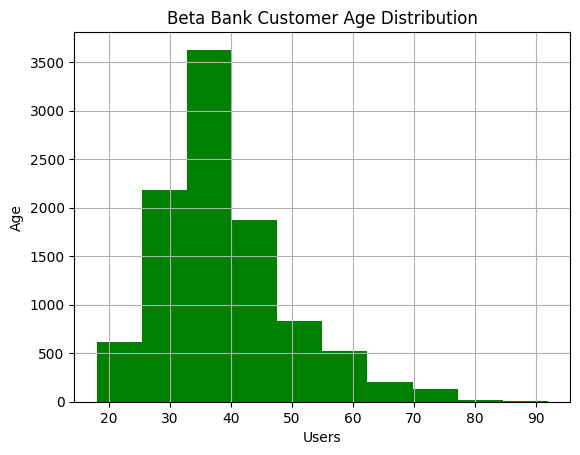

In [15]:
#explore distribution of Age columns as historgrams  
beta['Age'].hist(color='green')
plt.xlabel('Users')
plt.ylabel('Age')
plt.title('Beta Bank Customer Age Distribution')
plt.show()

Beta Bank customers seem to vary.  There is a high concentration of users between 20-50 years old.  However users above age 60 are not as plentiful.  In fact there are some outliers of users above 80 and 90 years old. 

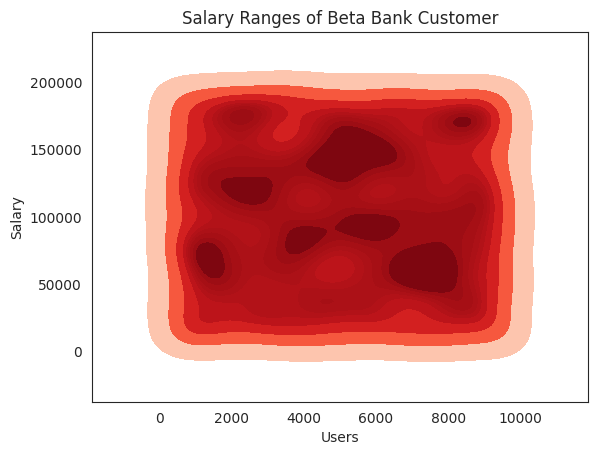

In [16]:
sns.set_style("white")
sns.kdeplot(x=beta.index, y=beta['EstimatedSalary'], cmap="Reds", fill=True)
plt.xlabel('Users')
plt.ylabel('Salary')
plt.title('Salary Ranges of Beta Bank Customer')
plt.show()

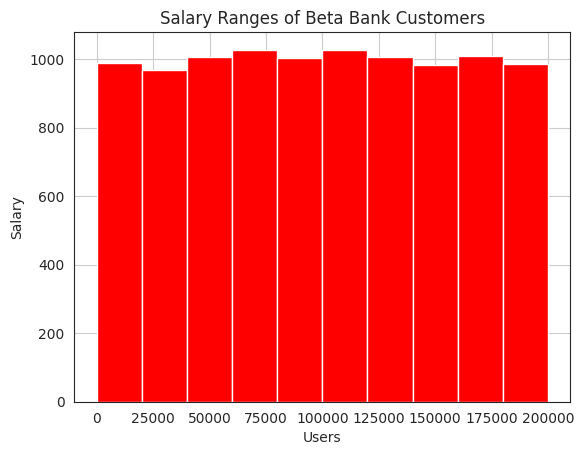

In [17]:
#explore distribution of Age columns as historgrams  
beta['EstimatedSalary'].hist(color='red')
plt.xlabel('Users')
plt.ylabel('Salary')
plt.title('Salary Ranges of Beta Bank Customers')
plt.show()

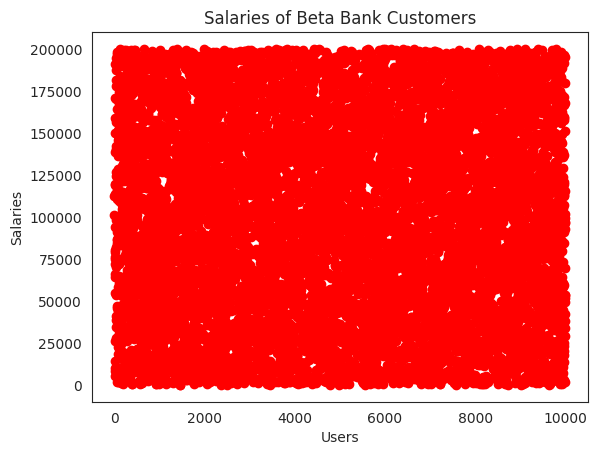

In [18]:
#explore distribution of salary as scatter plot  
plt.scatter( beta.index, y=beta["EstimatedSalary"], color='red')
plt.xlabel('Users')
plt.ylabel('Salaries')
plt.title('Salaries of Beta Bank Customers')
plt.show()

Beta Bank seems to be focused on a higher economic level.  Data is pulled from European countries (Spain, France, Germany).  The average annual salary for Europe in 2024 is 28,000 Euros.  Large concentrations of customers are around 150,000.  There is even a concenentration pocket closer to 200,000 Euros.  A large grouping also observed hovering above 50,000 Euros. To maintain clientle of this caliber it stands to reason why Beta Bank is focused on customer retention.   

In [19]:
#split source data into test, training and validation set of 6:2:2
#create split of 60% to training and 40% assigned as temp 
beta_train, beta_temp=train_test_split(beta, test_size=0.4, random_state=54321)
#create split from beta_temp to _validation and _test dataframes. Sources 20% of data to each. 
beta_valid, beta_test=train_test_split(beta_temp, test_size=0.5, random_state=54321)
display(beta_train.head())
display(beta_valid.head())
display(beta_test.head())


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5241,574,2,1,41,1.0,0.00,2,0,0,70550.00,0
5716,611,3,1,37,1.0,117524.72,2,0,1,161064.29,0
8581,585,2,2,43,2.0,0.00,2,1,0,89402.54,0
3808,701,3,1,41,0.0,150844.94,1,0,1,127623.36,0
8541,647,1,1,47,5.0,105603.21,2,1,1,157360.90,0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6444,693,3,2,37,6.0,95900.04,1,1,1,38196.24,0
6236,553,2,1,38,3.0,99844.68,1,0,0,187915.70,0
521,850,2,1,56,7.0,131317.48,1,1,1,119175.45,0
9614,746,2,2,37,4.0,0.00,2,0,1,171039.56,0
1129,669,2,2,35,7.0,0.00,1,1,1,49108.23,1


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5910,481,2,2,39,6.0,0.00,1,1,1,24677.54,0
849,705,2,1,25,0.0,97544.29,1,0,1,59887.15,0
1689,595,1,1,35,8.0,0.00,1,1,0,100015.79,1
3129,631,3,1,37,9.0,131519.49,2,1,1,51752.18,0
3611,746,2,2,21,8.0,166883.07,2,0,1,194563.65,0


In [20]:
#define variables for training 
features_train = beta_train.drop(['Exited'], axis=1)
target_train = beta_train['Exited']
#define variables for testing
features_test = beta_test.drop(['Exited'], axis=1)
target_test = beta_test['Exited']
#define variables for validation 
features_valid = beta_valid.drop(['Exited'], axis=1)
target_valid = beta_valid['Exited']


In [21]:
#test with Decision Tree Classifier 

best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 10):
    #tested ranges from 5 to 500.  once hit 10 and up the accuracy stayed at 0.8625 and best depth was one number before end of range. 
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print("Best depth:", best_depth)


Best depth: 7


In [22]:
decision_model = DecisionTreeClassifier(random_state=54321, max_depth=7)
decision_model.fit(features_train, target_train)
decision_predictions_valid = model.predict(features_valid)

# display f1 score
predicted_valid = model.predict(features_valid)
print("Imbalanced Decision Tress F1 Score:",f1_score(target_valid, predicted_valid))

Imbalanced Decision Tress F1 Score: 0.5550660792951542


In [23]:
#test with Logistic Regression 

#train and validate model 
logistic_model =LogisticRegression(random_state=54321, solver='liblinear') 
logistic_model.fit(features_train, target_train)
score_train = logistic_model.score(features_train, target_train)  
score_valid = logistic_model.score(features_valid, target_valid)  

In [24]:
#test logistic regression model on validation set
logistic_predictions_valid = logistic_model.predict(features_valid)

# display f1 score
predicted_valid = model.predict(features_valid)
print("Imbalanced Logistic Regression F1 Score:",f1_score(target_valid, predicted_valid))

Imbalanced Logistic Regression F1 Score: 0.5550660792951542


In [25]:
#test with Random Forest Regression 

best_score = 0
best_est = 0
for est in range(1,50): 
    # choose hyperparameter range (tried between 1-10/50/100)
    model = RandomForestRegressor(random_state=54321, n_estimators=est) 
    model.fit(features_train, target_train) 
    score = f1_score(target_valid, predictions) 
    if score > best_score:
        best_score = score
        best_est = est

print("F1 of the best model on the imbalanced Random Forest Regression validation set (n_estimators = {}): {}".format(best_est, best_score))


F1 of the best model on the imbalanced Random Forest Regression validation set (n_estimators = 1): 0.5550660792951542


In [26]:
#find best paramaters for Random Forest Classifier for imbalanced df 
param_grid = {
    'n_estimators': [1, 5, 20, 20, 50, 100, 200, 300],
    'max_depth': [1, 5, 10, 20, 50, 100, None],
    'random_state': [1, 5, 10, 20, 50, 100, 12345, 33333,54321, None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(features_train,target_train)

print("Imbalanced Random Forest Best parameters:", grid_search.best_params_)

Imbalanced Random Forest Best parameters: {'max_depth': 20, 'n_estimators': 200, 'random_state': 12345}


In [27]:
#test with Random Forest Classifier 

model = RandomForestClassifier(random_state=12345, n_estimators=200, max_depth=20) 
model.fit(features_train, target_train) 
rf_predictions_valid = model.predict(features_valid)

#AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print("Imbalanced Random Forest AUC-ROC:", auc_roc)

# display f1 score
predicted_valid = model.predict(features_valid)
print("imbalanced Random Forest F1 Score:",f1_score(target_valid, predicted_valid))

Imbalanced Random Forest AUC-ROC: 0.8508703124999999
imbalanced Random Forest F1 Score: 0.5727699530516431


Initial model testing was performed without altering the source data.  The following information compares the results form the test test.  
Decision Tree Test F1 Score  was 0.555.  
F1 Score of Logistic Regression was 0.555. 
Highest F1 score was Random Forest Classifier at 0.572.

Data will now be adjusted to accomodate the class imbalance previously observed.  

In [28]:
#1. downsample Beta customers The number of users that have remained at Beta bank in our sample almost 4x larger.
# Separate the rows where the target column is 1
subset = beta[beta['Exited'] == 0]

# Downsample to 2,037 rows to match existing samples provided of Beta customers that have left. 
subset_downsampled = subset.sample(n=2037, random_state=40)  

# Combine with the rest of the data (where target_column is not 1)
remaining_data = beta[beta['Exited'] != 0]
beta_downsampled = pd.concat([subset_downsampled, remaining_data])
beta_downsampled.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4003,750,2,2,26,1.0,151510.17,2,1,1,19921.72,0
2271,665,3,1,25,5.0,153611.83,2,1,0,35321.65,0
7182,692,3,1,49,5.0,110540.43,2,0,1,107472.99,0
9961,573,1,1,44,9.0,0.00,2,1,0,107124.17,0
1585,538,2,1,33,6.0,93791.38,1,1,1,199249.29,0


In [29]:
#examine class balance after downsampling 
print(beta_downsampled['Exited'].value_counts())

0    2037
1    2037
Name: Exited, dtype: int64


Rerun models on edited dataframe "beta_downsampled"

In [30]:
#define downsampled variables for training 
down_features_train = beta_downsampled.drop(['Exited'], axis=1)
down_target_train = beta_downsampled['Exited']


In [31]:
#test with Decision Tree Classifier 

best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 500):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model.fit(down_features_train, down_target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print("Best depth:", best_depth)
print('Decision Tree Downsampled F1 =', f1_score(target_valid, predicted_valid))



Best depth: 19
Decision Tree Downsampled F1 = 0.5727699530516431


In [32]:
#retest with Logistic Regression 

#train and validate model 
logistic_model =LogisticRegression(random_state=54321, solver='liblinear') 
logistic_model.fit(down_features_train, down_target_train)

LogisticRegression(random_state=54321, solver='liblinear')

In [33]:
#AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# create auc_roc
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print("Downsampled Logistic Regression AUC-ROC:", auc_roc)

# display f1 score
predicted_valid = model.predict(features_valid)
print("Downsampled Logistic Regression F1 Score:",f1_score(target_valid, predicted_valid))

Downsampled Logistic Regression AUC-ROC: 0.8937499999999999
Downsampled Logistic Regression F1 Score: 0.7017543859649124


In [34]:
#find best paramaters for Random Forest Classifier for downsampled 
param_grid = {
    'n_estimators': [1, 5, 20, 20, 50, 100, 200, 300],
    'max_depth': [1, 5, 10, 20, 50, 100, None],
    'random_state': [1, 5, 10, 20, 50, 100, 12345, 33333,54321, None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(down_features_train,down_target_train)

print("Downsampled Random Forest Best parameters:", grid_search.best_params_)

Downsampled Random Forest Best parameters: {'max_depth': 10, 'n_estimators': 300, 'random_state': 100}


In [35]:
#test with Random Forest Classifier 

model = RandomForestClassifier(random_state=100, n_estimators=300, max_depth=10) 
model.fit(down_features_train, down_target_train) 
rf_predictions_valid = model.predict(features_valid)

#AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print("Downsampled Random Forest AUC-ROC:", auc_roc)

# display f1 score
predicted_valid = model.predict(features_valid)
print("Downsampled Random Forest F1 Score:",f1_score(target_valid, predicted_valid))

Downsampled Random Forest AUC-ROC: 0.938828125
Downsampled Random Forest F1 Score: 0.6775431861804223


Downsample Summary:
Downsampled Decision Tress F1 Score: 0.57. 
Downsampled Logistic Regression F1 Score: 0.70. 
Downsampled Random Forest F1 Score: 0.68. 

In [36]:
#2. upsample customers who have left Beta Bank from original dataframe beta. 
# Separate majority and minority classes
beta_customers = beta_train[beta_train['Exited'] == 0]
beta_departed_customers = beta_train[beta_train['Exited'] == 1]

# Upsample minority class
departed_customers_upsampled = resample(beta_departed_customers, 
                                 replace=True,  # Sample with replacement
                                 n_samples=len(beta_customers),  # Match majority class size, should be 5k
                                 random_state=40)  # For reproducibility

# Combine majority and upsampled minority class
beta_upsampled = pd.concat([beta_customers, departed_customers_upsampled])
beta_upsampled.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5241,574,2,1,41,1.0,0.00,2,0,0,70550.00,0
5716,611,3,1,37,1.0,117524.72,2,0,1,161064.29,0
8581,585,2,2,43,2.0,0.00,2,1,0,89402.54,0
3808,701,3,1,41,0.0,150844.94,1,0,1,127623.36,0
8541,647,1,1,47,5.0,105603.21,2,1,1,157360.90,0


In [37]:
#examine class balance after upsampling  
print(beta_upsampled['Exited'].value_counts())

0    4788
1    4788
Name: Exited, dtype: int64


Rerun models on edited dataframe "beta_upsampled"

In [38]:
#define Upsampled variables for training 
up_features_train = beta_upsampled.drop(['Exited'], axis=1)
up_target_train = beta_upsampled['Exited']


<div class="info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Student's comment 3 </h2>
    
Removed 4 variables (up_feature/target_valid/test).  will use validation and test from initial beta df. 

</div>

In [39]:
#test with Decision Tree Classifier 
best_model = None
best_result = 0
for depth in range(1, 10):
    #tested ranges from 5 to 500.  once hit 10 and up the accuracy stayed at 0.8625 and best depth was one number before end of range. 
	model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
	model.fit(up_features_train, up_target_train)
	predictions = model.predict(features_valid)
	result = f1_score(target_valid,predictions)
	if result > best_result:
		best_model = model
		best_result = result
print("Upsampled Decision Tree Best depth:", depth)


Upsampled Decision Tree Best depth: 9


In [40]:
#upsampled decission tree classifier 
decision_model = DecisionTreeClassifier(random_state=54321, max_depth=9)
decision_model.fit(up_features_train, up_target_train)
decision_predictions_valid = model.predict(features_valid)

#AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# create auc_roc
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print("Upsampled Decision Tree AUC-ROC:", auc_roc)

# display f1 score
predicted_valid = model.predict(features_valid)
print("Upsampled Decision Tress F1 Score:",f1_score(target_valid, predicted_valid))

Upsampled Decision Tree AUC-ROC: 0.79705546875
Upsampled Decision Tress F1 Score: 0.5741728922091782


In [41]:
#retest upsampled df on Logistic Regression 

#train and validate model 
logistic_model =LogisticRegression(random_state=54321, solver='liblinear') 
logistic_model.fit(up_features_train, up_target_train) 

#AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# create auc_roc
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print("Upsampled Logistic Regression AUC-ROC:", auc_roc)

# display f1 score
predicted_valid = model.predict(features_valid)
print("Upsampled Logistic Regression F1 Score:",f1_score(target_valid, predicted_valid))


Upsampled Logistic Regression AUC-ROC: 0.79705546875
Upsampled Logistic Regression F1 Score: 0.5741728922091782


In [42]:
#find best parameters for upsampled RandomForest Classifier 
param_grid = {
    'n_estimators': [1, 5, 20, 20, 50, 100, 200, 300],
    'max_depth': [1, 5, 10, 20, 50, 100, None],
    'random_state': [1, 5, 10, 20, 50, 100, 12345, 33333,54321, None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(up_features_train,up_target_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 50, 'n_estimators': 100, 'random_state': None}


In [43]:
#test with Random Forest Classifier 

model = RandomForestClassifier(random_state=50, n_estimators=50, max_depth=50) 
model.fit(up_features_train, up_target_train) 
rf_predictions_valid = model.predict(features_valid)

#AUC-ROC
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid, probabilities_one_valid)
print("Upsampled Random Forest AUC-ROC:", auc_roc)

# display f1 score
predicted_valid = model.predict(features_valid)
print("Upsampled Random Forest F1 Score:",f1_score(target_valid, predicted_valid))



Upsampled Random Forest AUC-ROC: 0.8453101562499998
Upsampled Random Forest F1 Score: 0.5966386554621849


Upsampled Summary:
Upsampled Decision Tress F1 Score: 0.574. 
Upsampled Logistic Regression F1 Score: 0.574. 
Upsampled Random Forest F1 Score: 0.60
The Upsampled Random Foest achieved the highest F1 score.  The model will now be run on the test data set. 


In [44]:
supervised_final_model = RandomForestClassifier(random_state=100, n_estimators=300, max_depth=10)
# change n_estimators to get best model
supervised_final_model.fit(features_test, target_test)

# display f1 score
predicted_valid = model.predict(features_test)
print("Supervised Final Model Random Forest on Test Data F1 Score using Downsampled parameters:",f1_score(target_test, predicted_valid))

Supervised Final Model Random Forest on Test Data F1 Score using Downsampled parameters: 0.6157826649417852


Editing the data to be examined had an intense shift in the data analysis. 

Initial model testing was performed without altering the source data.  The following information compares the results form the test test.  
Decision Tree Test F1 Score  was 0.555.  
F1 Score of Logistic Regression was 0.555. 
Highest F1 score was Random Forest Classifier Test Accuracy at 0.556.

Downsample Summary:
Downsampled Decision Tress F1 Score: 0.70. 
Downsampled Logistic Regression F1 Score: 0.70. 
Downsampled Random Forest F1 Score: 0.68. 
Decision Tree and Logistic Regression maintain same pattern of equal scores.  Downsampling scores achieved higher f1 scores so performed on test data.  

Upsampled Summary:
Upsampled Decision Tress F1 Score: 0.57. 
Upsampled Logistic Regression F1 Score: 0.57. 
Upsampled Random Forest F1 Score: 0.60. 
Decision Tree and Logistic Regression maintain same pattern of equal scores. 

Final model computed was the Downsampled Random Forest on Test Data since the training and validation data achieved the highest F1.  Final F1 Score is 0.62.  

Interestingly the Decision Tree and Logistic Regression F1 score was the same through unbalanced, downsampled, and upsampled testing.  Random Forest remained the best model. The best F1 score was achieved of 0.615 when the test data was run on the upsampled data set.  The closer the F1 score is to 1 is an indication of how accurately the prediction of exiting customers has been.  

Beta Bank indeed should develop more strategies to retain their current clients.    